In [1]:
# this is for jo
import os
os.chdir('../')

2024-04-22 22:43:17.664 | INFO     | gdsfactory.pdk:activate:309 - 'generic' PDK is now active
BEND DIST 1000.0
waypoints [[ 15.5   0. ]
 [135.5   0. ]
 [135.5  81. ]
 [125.5  81. ]]


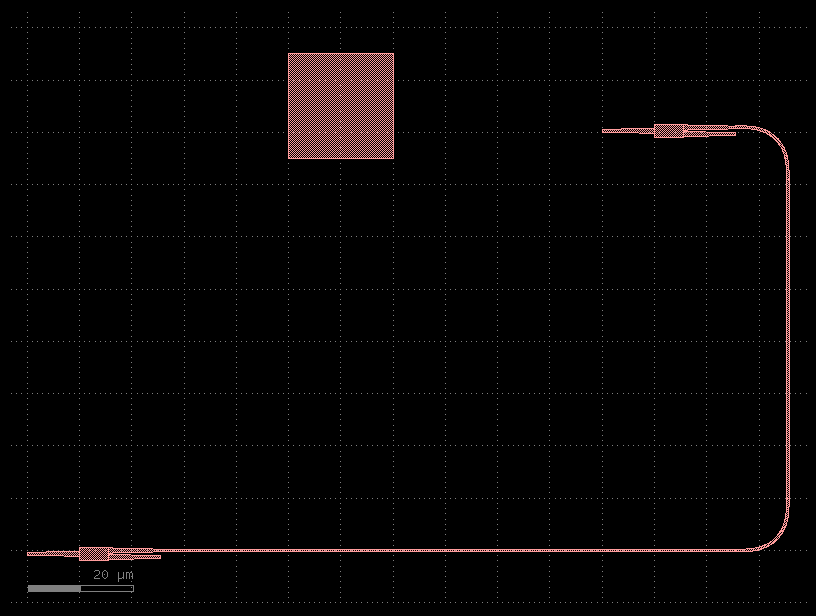

In [2]:
# Test Routing
from functools import partial
import gdsfactory as gf
from gdsfactory.cell import cell
from gdsfactory.component import Component
from gdsfactory.generic_tech import get_generic_pdk
from gdsfactory.port import Port

gf.config.rich_output()

c = gf.Component("sample_problem")
mmi1 = c << gf.components.mmi1x2()
mmi1.move((0, -0.625))
mmi2 = c << gf.components.mmi1x2()
mmi2.move((110, 80.375))

rec = gf.Component("rectangle_polygon")
rec.add_polygon(
       [(-10, -10, 10, 10), (-10, 10, 10, -10)], layer=(1, 0)
   )
x = c << rec
# x.move((130, 20))
x.move((50, 85))
# x.move((130, 50))
# x.move((130, 5))

# rec2 = gf.Component("rectangle_polygon")
# rec2.add_polygon(
#        [(-5, -5, 5, 5), (-5, 5, 5, -5)], layer=(1, 0)
#    )
# y = c << rec2
# y.move((115, 30))

# route = gf.routing.get_route(mmi1.ports["o2"], mmi2.ports["o2"], component=c, component_margin=5)
route = gf.routing.get_route(mmi1.ports["o2"], mmi2.ports["o2"], component=c, component_margin=5)
c.add(route.references)
c.plot()

In [ ]:
from functools import partial
import gdsfactory as gf
from gdsfactory.cell import cell
from gdsfactory.component import Component
from gdsfactory.generic_tech import get_generic_pdk
from gdsfactory.port import Port

gf.config.rich_output()

c = gf.Component("sample_connect")
mmi1 = c << gf.components.mmi1x2()
mmi1.move((0, -0.625))
mmi2 = c << gf.components.mmi1x2()
mmi2.move((100, 50))

route = gf.routing.get_route(mmi1.ports["o2"], mmi2.ports["o1"], c)
c.add(route.references)
# c.plot()

In [ ]:
c = gf.Component("workspace")
mmi1 = c << gf.components.mmi1x2()
mmi2 = c << gf.components.mmi1x2()
mmi2.move((120, 100))

x = c << gf.components.rectangle(size=[20, 20], layer=(1, 0))
# rec = gf.Component("rectangle_polygon")
# rec.add_polygon(
#         [(-10, -10, 10, 10), (-10, 10, 10, -10)], layer=(1, 0)
#     )
# x = c << rec
x.move((130, 20))

rec2 = gf.Component("rectangle_polygon_2")
rec2.add_polygon(
        [(-10, -10, 10, 10), (-10, 10, 10, -10)], layer=(1, 0)
    )
y = c << rec2
y.move((200, 20))

# z = c << gf.components.cross(length=20)
# z.move((150, 20))

route = gf.routing.get_route(mmi1.ports["o2"], mmi2.ports["o2"], c, component_margin=0.3)
# route2 = gf.routing.get_route(mmi1.ports["o2"], mmi2.ports["o2"], c)
c.add(route.references)
c.plot()

In [ ]:
# PLAYGROUND
obstacle_list = list(set(c.references) - {mmi1, mmi2})
print(obstacle_list)

obstacles_w_origin = [[np.array(obstacle.origin), obstacle] for obstacle in obstacle_list]
restricted_area = []

while len(obstacles_w_origin) > 0:
    origin, obstacle = obstacles_w_origin.pop(0)
    if len(obstacle.parent.polygons) != 0:
        for polygon in obstacle.parent.polygons:
            points = polygon.points
            points[points > 0] += 5
            points[points < 0] -= 5
            restricted_area.append(points + origin)
    if len(obstacle.parent.references) != 0:
        for reference in obstacle.parent.references:
            obstacles_w_origin.append([np.array(reference.origin) + origin, reference])
print(restricted_area)
    
restricted_area = []
for obstacle in obstacle_list:
    print(obstacle.origin)
    print(obstacle.parent.references)
    print(obstacle.parent.polygons)


    origin = np.array(obstacle.origin)
    for polygon in obstacle.parent.polygons:
        restricted_area.append(polygon.points + origin)
print(restricted_area)

In [ ]:
c = gf.Component("sample_no_routes")
mmi1 = c << gf.components.mmi1x2()
mmi2 = c << gf.components.mmi1x2()
mmi2.move((100, 50))
c.plot()

## get_bundle

To route groups of ports avoiding waveguide collisions, you should use `get_bundle` instead of `get_route`.

`get_bundle` uses a river/bundle/bus router.

At the moment it works only when each group of ports have the same orientation.


In [ ]:
ys_right = [0, 10, 20, 40, 50, 80]
pitch = 127.0
N = len(ys_right)
ys_left = [(i - N / 2) * pitch for i in range(N)]
layer = (1, 0)

right_ports = [
    gf.Port(f"R_{i}", center=(0, ys_right[i]), width=0.5, orientation=180, layer=layer)
    for i in range(N)
]
left_ports = [
    gf.Port(f"L_{i}", center=(-200, ys_left[i]), width=0.5, orientation=0, layer=layer)
    for i in range(N)
]

# you can also mess up the port order and it will sort them by default
left_ports.reverse()

c = gf.Component(name="connect_bundle_v2")
routes = gf.routing.get_bundle(
    left_ports,
    right_ports,
    sort_ports=True,
    start_straight_length=100,
    enforce_port_ordering=False,
)
for route in routes:
    c.add(route.references)
c.plot()